# Housing Prices - Challenge 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [8]:
house_it_6_v2 = pd.read_csv("/your_path/housing-classification-iter6.csv")
pd.set_option('display.max_columns', None)
house_it_6_v2.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,BsmtFinType2,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,NaN,60,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,1,8,2003.0,548,61,0,0,0,2,2008,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,Gd,ALQ,TA,TA,20,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,1,6,1976.0,460,0,0,0,0,5,2007,2,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Mn,GLQ,Gd,TA,60,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,1,6,2001.0,608,42,0,0,0,9,2008,3,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,No,ALQ,Gd,Gd,70,7,5,1915,1970,0.0,216,0,540,961,756,0,1717,1,0,1,0,1,7,1998.0,642,35,272,0,0,2,2006,4,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,Unf,Gd,SBrkr,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Av,GLQ,Gd,TA,60,8,5,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,1,9,2000.0,836,84,0,0,0,12,2008,5,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [212]:
test = pd.read_csv("/your_path/test.csv")
pd.set_option('display.max_columns', None)
test.shape

(1459, 80)

In [213]:
house_it_6_v2.shape

(1460, 81)

In [214]:
test.shape

(1459, 80)

In [215]:
test.columns

Index(['Id', 'LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr',
       'Fireplaces', 'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch',
       'MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu',
       'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtFinT

## Descriptive Statistics

             LotArea  LotFrontage  TotalBsmtSF  BedroomAbvGr   Fireplaces  \
count    1460.000000  1201.000000  1460.000000   1460.000000  1460.000000   
mean    10516.828082    70.049958  1057.429452      2.866438     0.613014   
std      9981.264932    24.284752   438.705324      0.815778     0.644666   
min      1300.000000    21.000000     0.000000      0.000000     0.000000   
25%      7553.500000    59.000000   795.750000      2.000000     0.000000   
50%      9478.500000    69.000000   991.500000      3.000000     1.000000   
75%     11601.500000    80.000000  1298.250000      3.000000     1.000000   
max    215245.000000   313.000000  6110.000000      8.000000     3.000000   

          PoolArea   GarageCars   WoodDeckSF  ScreenPorch    Expensive  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      2.758904     1.767123    94.244521    15.060959     0.148630   
std      40.177307     0.747315   125.338794    55.757415     0.355845   
min       

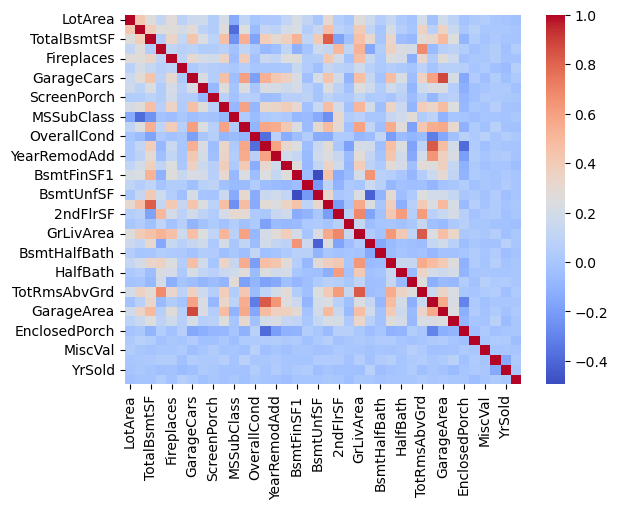

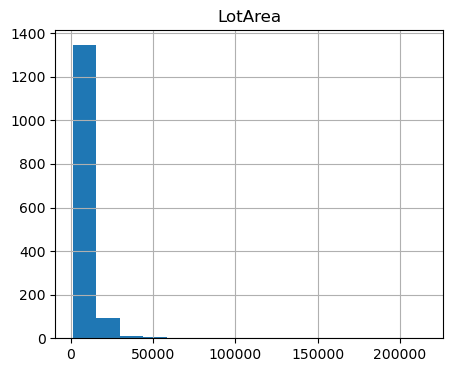

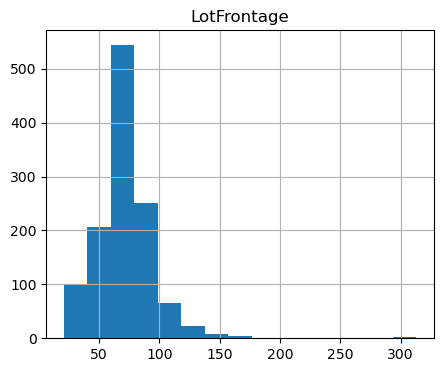

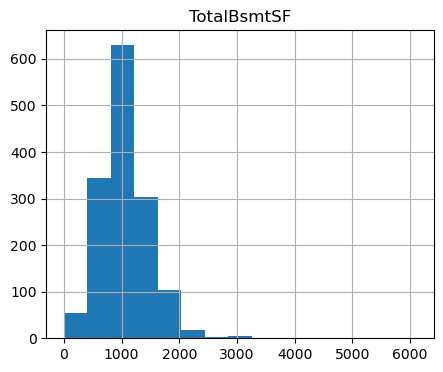

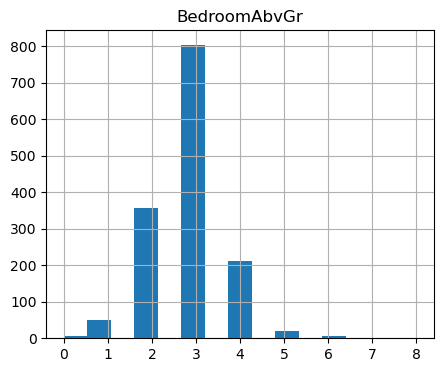

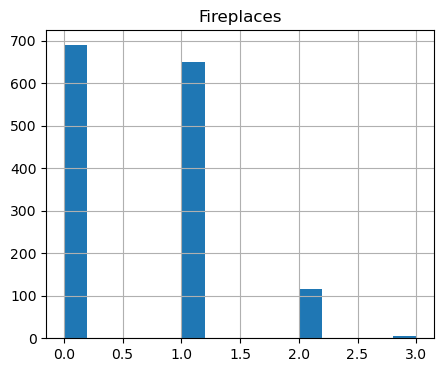

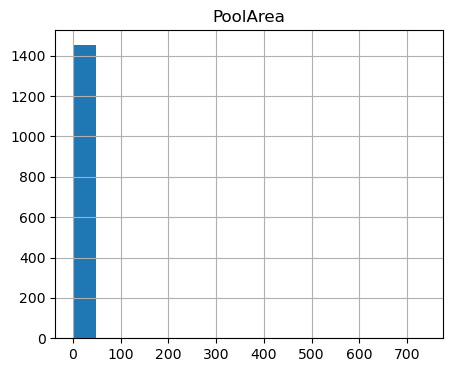

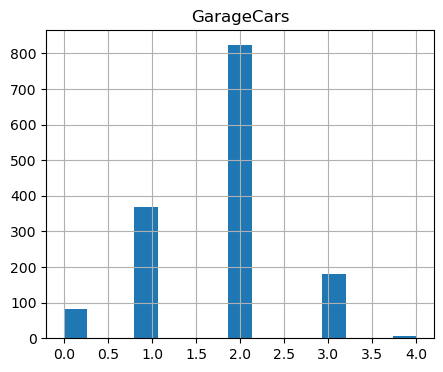

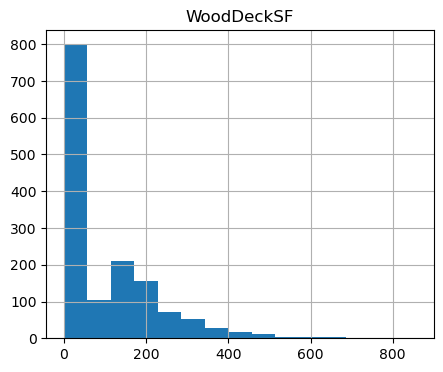

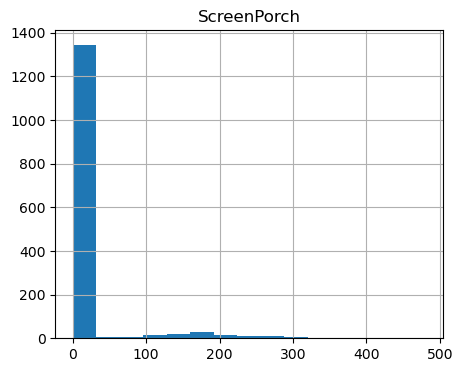

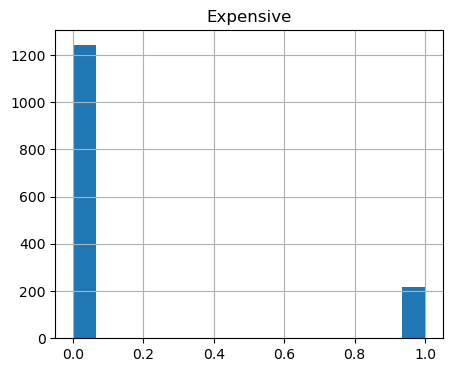

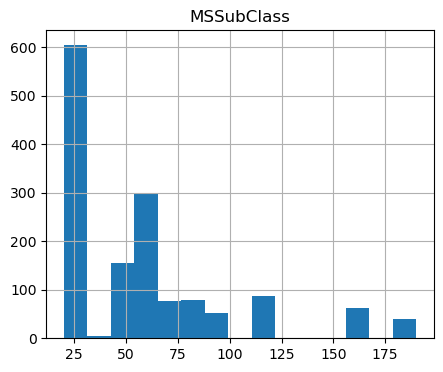

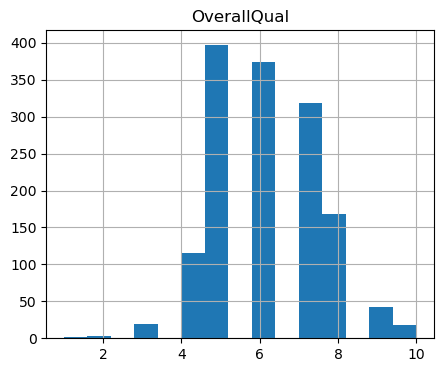

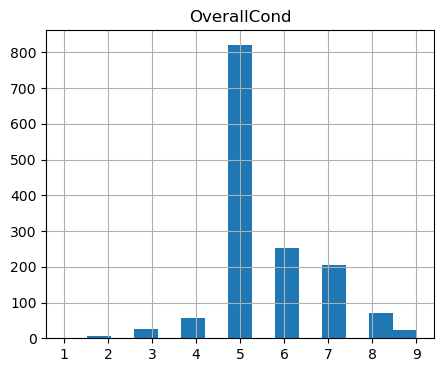

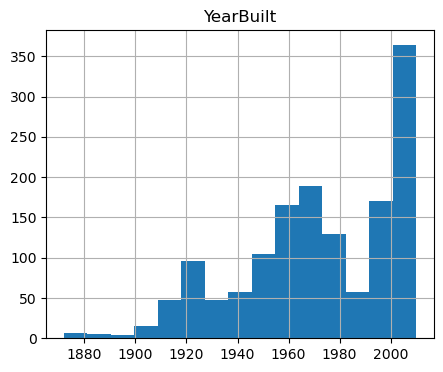

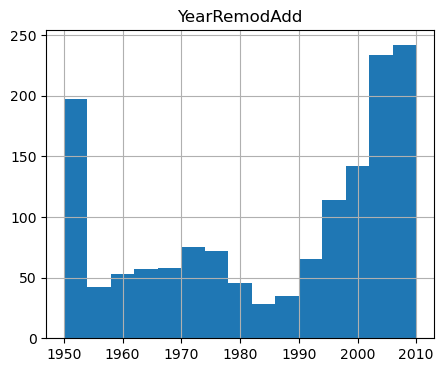

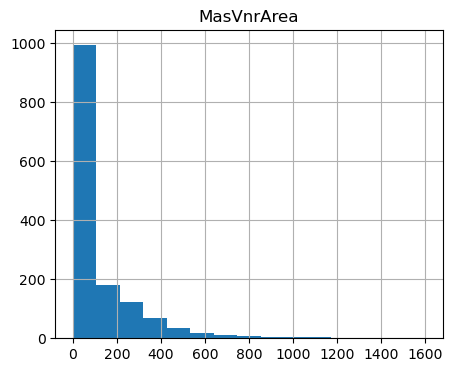

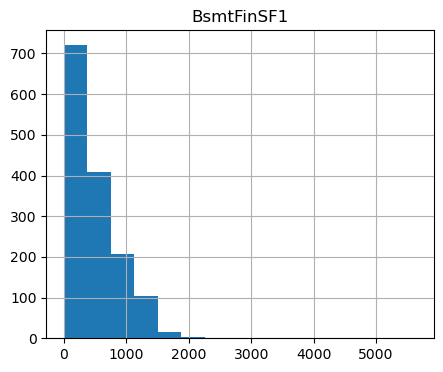

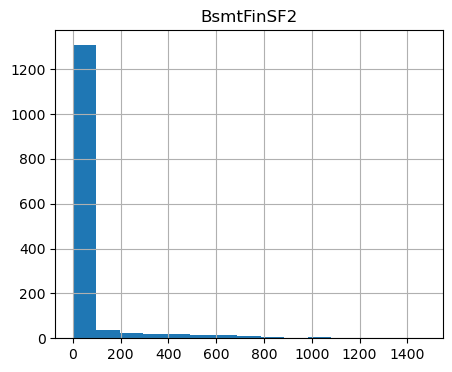

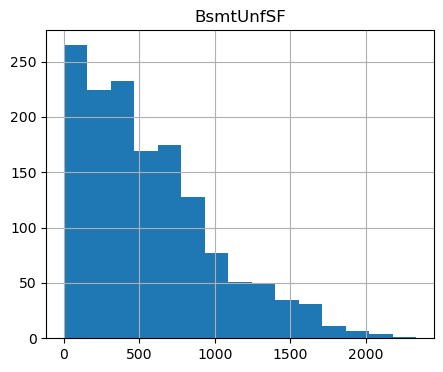

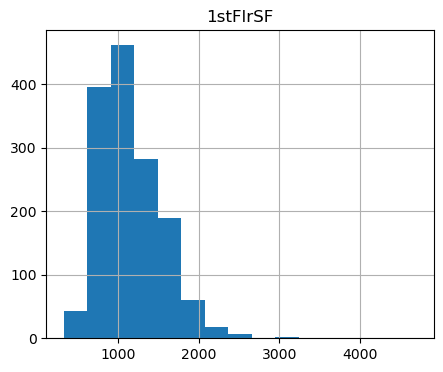

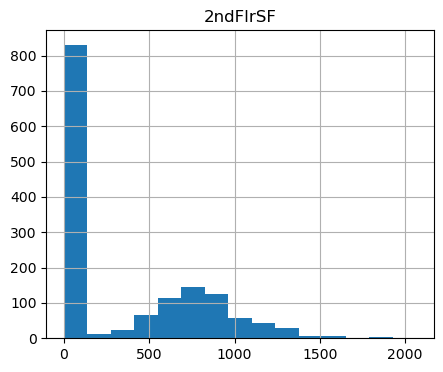

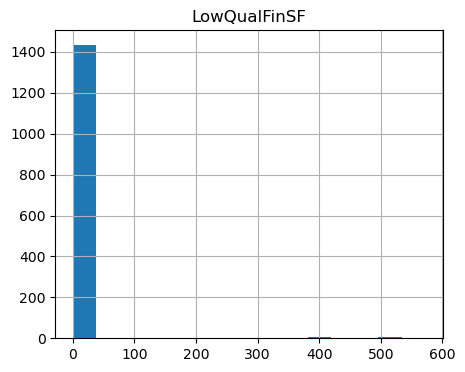

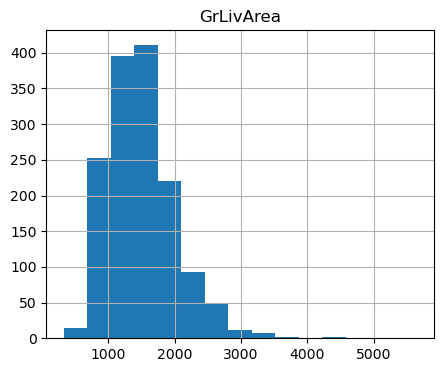

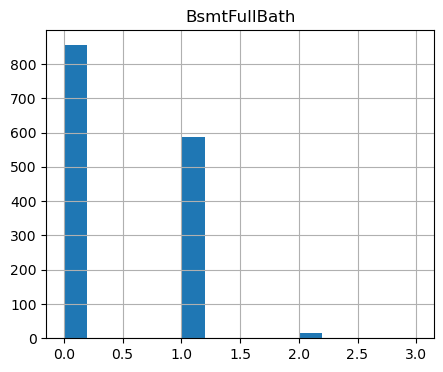

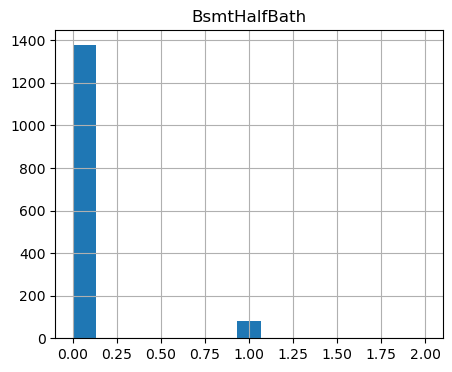

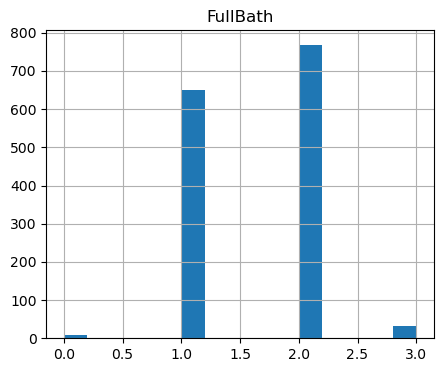

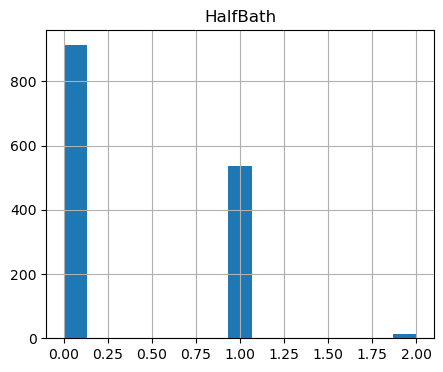

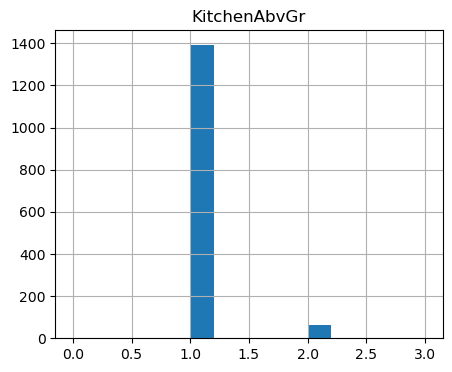

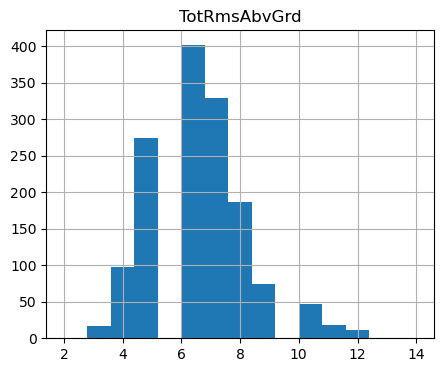

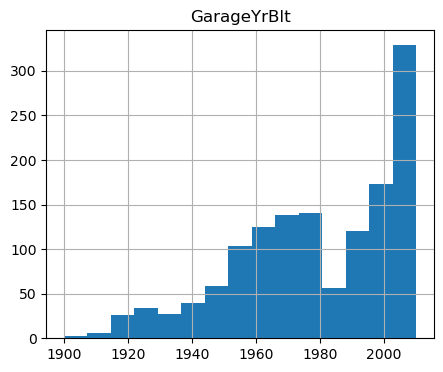

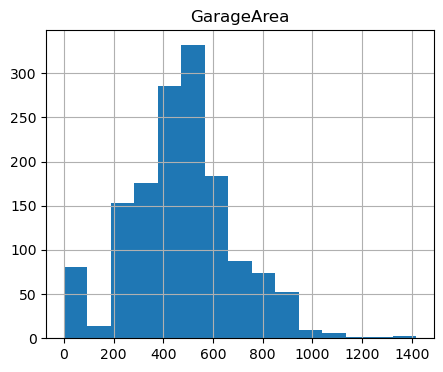

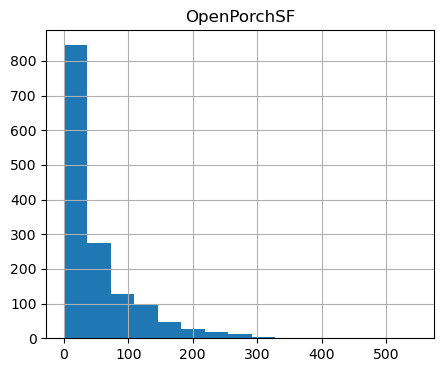

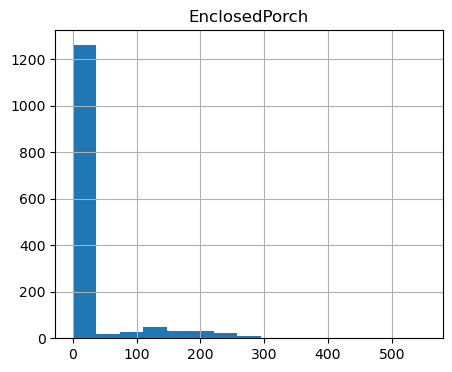

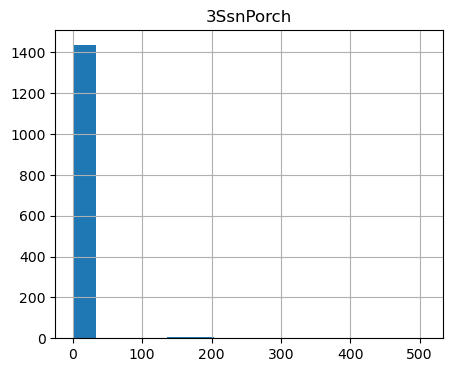

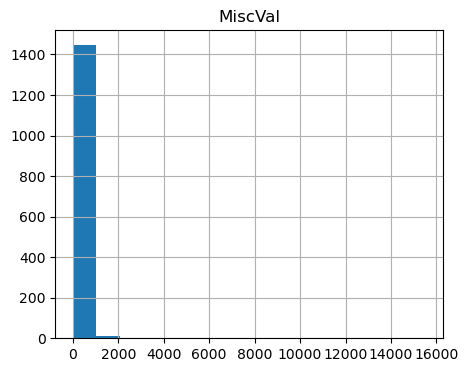

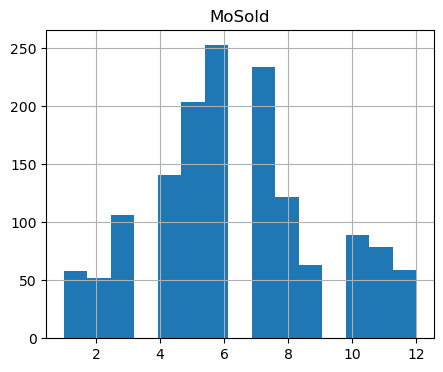

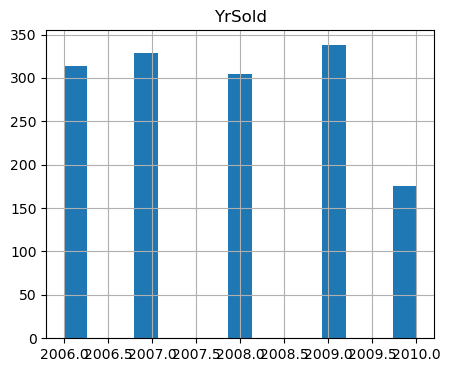

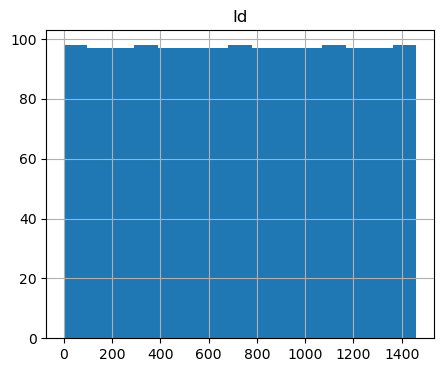

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print(house_it_6_v2.describe())  # Numerical features
print(house_it_6_v2.describe(include=['O']))  # Categorical features

# Check for Missing Values
missing_values = house_it_6_v2.isnull().sum()
print("Missing values per column:\n", missing_values)

# Check for Duplicated Values
duplicates = house_it_6_v2.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

# Correlation Analysis for numerical features
correlation_matrix = house_it_6_v2.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

# Adjusting Histograms to fit all numerical variables
# Select numerical columns and plot histograms
numerical_columns = house_it_6_v2.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(5, 4))
    house_it_6_v2[column].hist(bins=15)
    plt.title(column)
    plt.show()

In [216]:
# Columns to drop
columns_to_drop = ['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', "Id"]

# Dropping the columns from the DataFrame
house_it_6_v2_2 = house_it_6_v2.drop(columns=columns_to_drop, axis=1)

In [217]:
columns_to_drop2 = ['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd']
test_2 = test.drop(columns=columns_to_drop2, axis=1)


In [218]:
test_2.shape

(1459, 76)

In [219]:
id_col = test_2.pop('Id')

## X and Y Creation & Data Splitting

In [220]:
#X and y creation
x = house_it_6_v2_2
y = x.pop("Expensive")

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

## Pipeline

In [221]:
# select categorical and numerical column names
x_cat_columns = x.select_dtypes(exclude="number").copy().columns
x_num_columns = x.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean" and StandardScaler)
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler())
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)

In [222]:
#Import
from sklearn.compose import ColumnTransformer

#Created the columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, x_num_columns), #1 branch called "num_pipe", will apply the steps in the numeric_pipe to the columns named in x_num_columns
        ("cat_pipe", categoric_pipe, x_cat_columns), #2 branch called "cat_pipe", will apply the steps in the categoric_pipe to the columns named in x_cat_columns
    ]
)

## Logistic Regression

In [223]:
#Creating the full pipeline
full_pipeline_log = make_pipeline(preprocessor, 
                              LogisticRegression()).set_output(transform='pandas')

In [224]:
#Fit
full_pipeline_log.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Yea...
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

## Grid Search: Parameter Grid/ Cross Validation

In [225]:
#Create parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "logisticregression__penalty": ["l2"], # Type of penalty
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    "logisticregression__solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"] # Optimization algorithm
}

In [226]:
#Define cross validation
search = GridSearchCV(full_pipeline_log,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

In [227]:
#Fit 
search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which me

C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubCla...
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__penalty': ['l2'],
                         'logisticregression__solver': ['lbfgs', 'liblinear',
                                                        'newton-cg',
                                                        'newton-cholesky',
                                                        'sag', 'saga']},
             verbose=1)

In [228]:
# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(search.best_params_)

Best parameters found by GridSearchCV:
{'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


In [229]:
search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Yea...
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('logisticregression',
                 LogisticRegression(C=0.1, solver='liblinear'))])

In [230]:
search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [231]:
y_train_pred = search.predict(x_train)
y_test_pred = search.predict(x_test)

## Accuracy, Precision and Recall

In [232]:
#Training Accuracy
train_accuracy_log = accuracy_score(y_train, y_train_pred)
train_accuracy_rounded_log = round(train_accuracy_log, 4)

print("The training data prediction is {:.2%} accurate Logistic Regress".format(train_accuracy_rounded_log))

The training data prediction is 96.66% accurate Logistic Regress


In [233]:
#Testing Accuracy
test_accuracy_log = accuracy_score(y_test, y_test_pred)
test_accuracy_rounded_log = round(test_accuracy_log, 4)

print("The test data prediction is {:.2%} accurate Logistic Regress".format(test_accuracy_rounded_log))

The test data prediction is 96.92% accurate Logistic Regress


In [234]:
# Training Precision Score
train_precision_log = precision_score(y_train, y_train_pred) 
train_precision_rounded_log = round(train_precision_log, 4)

print("The training data prediction is {:.2%} precision Logistic Regress".format(train_precision_rounded_log))

The training data prediction is 94.16% precision Logistic Regress


In [235]:
#Testing Precision Score 
test_precision_log = precision_score(y_test, y_test_pred) 
test_precision_rounded_log = round(test_precision_log, 4)

print("The test data prediction is {:.2%} precision Logistic Regress".format(test_precision_rounded_log))

The test data prediction is 92.31% precision Logistic Regress


In [236]:
# Training Recall Score
train_recall_log = recall_score(y_train, y_train_pred) 
train_recall_rounded_log = round(train_recall_log, 4)

print("The training data Recall Score is {:.2%} recall Logistic Regress".format(train_recall_rounded_log))

The training data Recall Score is 82.86% recall Logistic Regress


In [237]:
# Testing Recall Score
test_recall_log = recall_score(y_test, y_test_pred) 
test_recall_rounded_log = round(test_recall_log, 4)

print("The test data prediction is {:.2%} recall Logistic Regress".format(test_recall_rounded_log))

The test data prediction is 85.71% recall Logistic Regress


In [238]:
# Confusion Matrix - Training
conf_matrix_train_log = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix - Training:\n", conf_matrix_train_log)

Confusion Matrix - Training:
 [[984   9]
 [ 30 145]]


In [239]:
# Confusion Matrix - Test
conf_matrix_test_log = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Testing:\n", conf_matrix_test_log)


Confusion Matrix - Testing:
 [[247   3]
 [  6  36]]


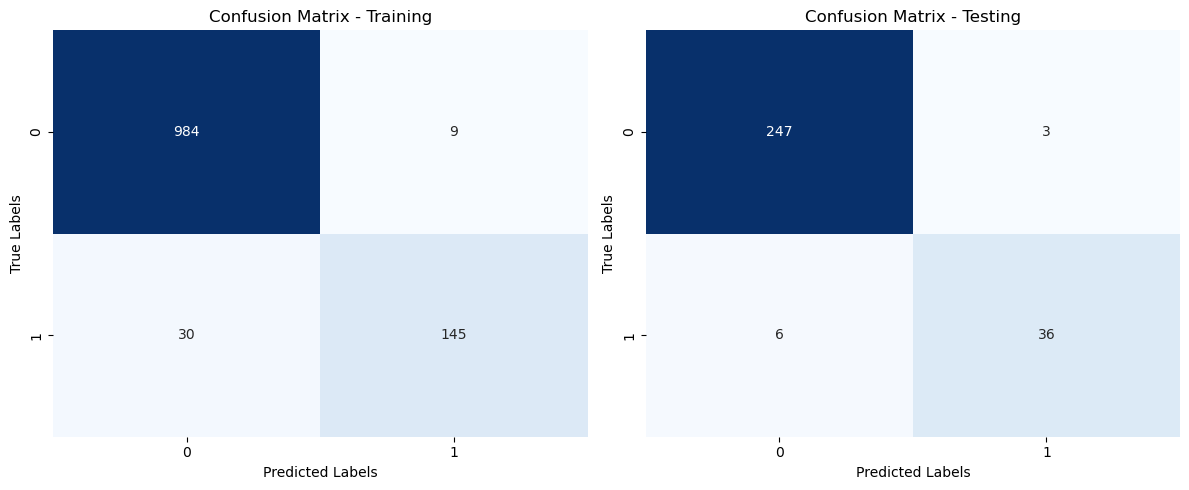

In [240]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrices
conf_matrix_train_log = confusion_matrix(y_train, y_train_pred)
conf_matrix_test_log = confusion_matrix(y_test, y_test_pred)

# Configuring the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Confusion Matrix - Training
sns.heatmap(conf_matrix_train_log, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Confusion Matrix - Test
sns.heatmap(conf_matrix_test_log, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Adjusting the layout
plt.tight_layout()
plt.show()

In [241]:
# Comparing metrics - Training
print("\nTraining Metrics:")
print("Accuracy: {:.2%}".format(train_accuracy_rounded_log))
print("Precision: {:.2%}".format(train_precision_rounded_log))
print("Recall: {:.2%}".format(train_recall_rounded_log))


Training Metrics:
Accuracy: 96.66%
Precision: 94.16%
Recall: 82.86%


In [242]:
# Comparing metrics - Test
print("\nTesting Metrics:")
print("Accuracy: {:.2%}".format(test_accuracy_rounded_log))
print("Precision: {:.2%}".format(test_precision_rounded_log))
print("Recall: {:.2%}".format(test_recall_rounded_log))


Testing Metrics:
Accuracy: 96.92%
Precision: 92.31%
Recall: 85.71%


In [243]:
metrics_df_log = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Training': [train_accuracy_rounded_log, train_precision_rounded_log, train_recall_rounded_log],
    'Testing': [test_accuracy_rounded_log, test_precision_rounded_log, test_recall_rounded_log]
})

print(metrics_df_log)

      Metric  Training  Testing
0   Accuracy    0.9666   0.9692
1  Precision    0.9416   0.9231
2     Recall    0.8286   0.8571


In [247]:
expensive = search.predict(test_2)
expensive

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Exporting for Compertition

In [248]:
submission_file = pd.DataFrame({'Id':id_col, 'Expensive':expensive})

In [249]:
submission_file.to_csv('submission_1.csv',index=False)